In [94]:
import pandas as pd

In [95]:
data = pd.read_csv('C:\\Users\\DigitalS\\OneDrive\\Desktop\\1st_project\\youtube_ad_revenue_dataset.csv')
data.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [96]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [97]:
data.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [98]:
# remove duplicates
data['video_id'].duplicated().sum()
data = data.drop_duplicates(subset='video_id', keep='first')

In [99]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.dtypes

video_id                        object
date                    datetime64[ns]
views                            int64
likes                          float64
comments                       float64
watch_time_minutes             float64
video_length_minutes           float64
subscribers                      int64
category                        object
device                          object
country                         object
ad_revenue_usd                 float64
dtype: object

In [100]:
data['likes'] = data['likes'].fillna(0)
data['comments'] = data['comments'].fillna(0)
data['watch_time_minutes'] = data['watch_time_minutes'].fillna(0)
print("Missing values handled.")
data.isnull().sum()

Missing values handled.


video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
dtype: int64

In [101]:
data['engagement_rate'] = (data[['likes','comments']].sum(axis=1) + 1) / (data['views'] + 1)
data['watch_per_view'] = data['watch_time_minutes'] / (data['views'] + 1)
    

In [102]:

# Sort video_id ascending
data["video_id_num"] = data["video_id"].str.extract(r'(\d+)', expand=False).astype(int)
data = data.sort_values("video_id_num")
data = data.drop(columns=["video_id_num"])

In [103]:
data.head(20)

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,watch_per_view
4902,vid_1,2025-04-18 10:50:40.993199,9842,813.0,409.0,21441.973094,26.858864,676937,Tech,Tablet,US,173.372580,0.124251,2.178398
3418,vid_2,2024-06-24 10:50:40.993199,9936,1842.0,475.0,57059.845756,14.439642,344803,Gaming,Tablet,AU,360.604239,0.233270,5.742160
1918,vid_3,2025-02-19 10:50:40.993199,9928,1852.0,74.0,0.000000,19.588520,285365,Music,Mobile,US,304.748928,0.194078,0.000000
2769,vid_4,2025-01-12 10:50:40.993199,10025,1182.0,75.0,23596.763762,15.392202,802598,Education,Tablet,AU,185.086477,0.125474,2.353557
2541,vid_5,2025-05-07 10:50:40.993199,10122,956.0,0.0,51283.035285,7.628782,776691,Education,Desktop,IN,314.658875,0.094537,5.065992
1179,vid_6,2025-05-31 10:50:40.993199,9940,920.0,428.0,22524.119214,6.690085,648195,Gaming,Desktop,DE,181.150621,0.135701,2.265780
7838,vid_7,2025-05-23 10:50:40.993199,10142,881.0,428.0,57999.018997,2.575680,664437,Education,Tablet,US,348.780495,0.129153,5.718133
3180,vid_8,2025-02-26 10:50:40.993199,10029,1931.0,160.0,32262.609630,20.075941,298993,Education,Mobile,IN,240.297010,0.208574,3.216611
16582,vid_9,2025-01-28 10:50:40.993199,9996,1557.0,275.0,34113.441280,19.616681,479685,Gaming,Tablet,AU,244.399354,0.183355,3.412368
14368,vid_10,2024-12-02 10:50:40.993199,10008,0.0,297.0,55910.098214,13.900128,620159,Tech,Mobile,DE,340.966799,0.029773,5.585982


In [104]:
data_cleaned = data.copy()
data_cleaned.to_csv("youtube_cleaned.csv", index=False)



MODEL BUILDING

In [105]:


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import statsmodels.api as sm
np.random.seed(42)

print("Libraries Loaded!")


Libraries Loaded!


In [106]:
df = pd.read_csv("C:\\Users\\DigitalS\\OneDrive\\Desktop\\1st_project\\youtube_cleaned.csv")
df.head()


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,watch_per_view
0,vid_1,2025-04-18 10:50:40.993199,9842,813.0,409.0,21441.973094,26.858864,676937,Tech,Tablet,US,173.372580,0.124251,2.178398
1,vid_2,2024-06-24 10:50:40.993199,9936,1842.0,475.0,57059.845756,14.439642,344803,Gaming,Tablet,AU,360.604239,0.233270,5.742160
2,vid_3,2025-02-19 10:50:40.993199,9928,1852.0,74.0,0.000000,19.588520,285365,Music,Mobile,US,304.748928,0.194078,0.000000
3,vid_4,2025-01-12 10:50:40.993199,10025,1182.0,75.0,23596.763762,15.392202,802598,Education,Tablet,AU,185.086477,0.125474,2.353557
4,vid_5,2025-05-07 10:50:40.993199,10122,956.0,0.0,51283.035285,7.628782,776691,Education,Desktop,IN,314.658875,0.094537,5.065992


In [107]:
# Drop video_id column (we don't use IDs for ML)
if 'video_id' in df.columns:
    df = df.drop(columns=['video_id'])
    print("✅ video_id column dropped")


✅ video_id column dropped


In [108]:
numeric_cols = ["views","likes","comments","subscribers","engagement_rate","watch_per_view"]
numeric_cols = [c for c in numeric_cols if c in df.columns]

categorical_cols = ["category","device","country"]
categorical_cols = [c for c in categorical_cols if c in df.columns]

target_col = "ad_revenue_usd"

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['views', 'likes', 'comments', 'subscribers', 'engagement_rate', 'watch_per_view']
Categorical Columns: ['category', 'device', 'country']


In [109]:
df = df.dropna(subset=[target_col])  # Drop missing target

X = df[numeric_cols + categorical_cols]
y = df[target_col]

X.head()


,views,likes,comments,subscribers,engagement_rate,watch_per_view,category,device,country
0,9842,813.0,409.0,676937,0.124251,2.178398,Tech,Tablet,US
1,9936,1842.0,475.0,344803,0.233270,5.742160,Gaming,Tablet,AU
2,9928,1852.0,74.0,285365,0.194078,0.000000,Music,Mobile,US
3,10025,1182.0,75.0,802598,0.125474,2.353557,Education,Tablet,AU
4,10122,956.0,0.0,776691,0.094537,5.065992,Education,Desktop,IN


In [110]:
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder="passthrough")


In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(X_train.shape, X_test.shape)


(3750, 9) (1250, 9)


In [112]:
models = {
    "LinearRegression": LinearRegression(),
    "RidgeCV": RidgeCV(alphas=np.logspace(-3, 3, 7)),
    "LassoCV": LassoCV(cv=5, max_iter=5000, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=120, random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}
    print(f"{name}: R2={r2:.4f}  RMSE={rmse:.4f}")


LinearRegression: R2=0.6999  RMSE=33.7920
RidgeCV: R2=0.6991  RMSE=33.8339
LassoCV: R2=0.0126  RMSE=61.2935
RandomForest: R2=0.9541  RMSE=13.2173


In [113]:
pd.DataFrame(results).T.sort_values("R2 Score", ascending=False)


,MAE,RMSE,R2 Score
RandomForest,4.304476,13.217346,0.954087
LinearRegression,21.006935,33.792013,0.699892
RidgeCV,21.295483,33.833949,0.699146
LassoCV,53.127562,61.293541,0.012632


In [114]:
best_model_name = max(results, key=lambda x: results[x]["R2 Score"])
best_model_name


'RandomForest'

In [115]:
best_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])

best_pipeline.fit(X_train, y_train)

joblib.dump(best_pipeline, "best_youtube_model.joblib")
joblib.dump(le, "video_id_encoder.joblib")

print("Model saved successfully!")


Model saved successfully!


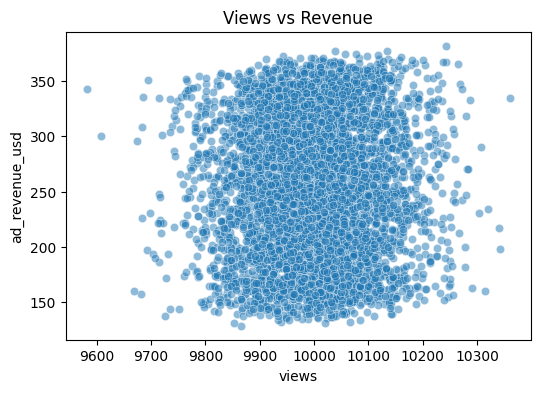

In [116]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="views", y="ad_revenue_usd", alpha=0.5)
plt.title("Views vs Revenue")
plt.show()


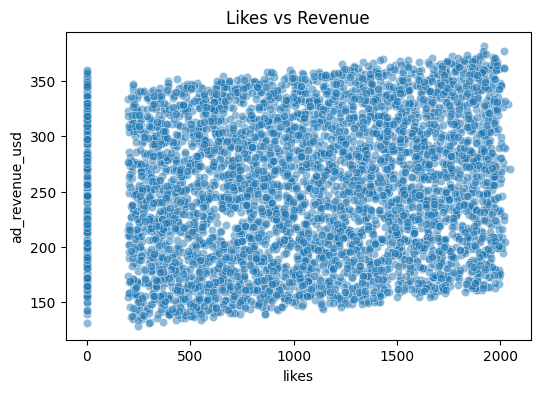

In [117]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="likes", y="ad_revenue_usd", alpha=0.5)
plt.title("Likes vs Revenue")
plt.show()


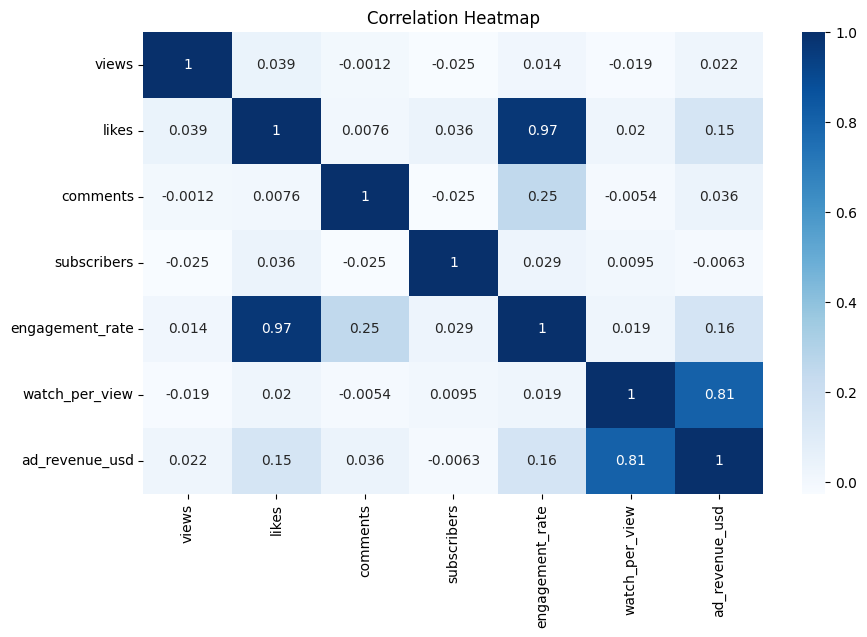

In [118]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols+[target_col]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()
